In [5]:
import os
import tweepy as tw
import pandas as pd

# Sentiment Analysis

In [6]:
#use the VADER Sentiment Analyzer 

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/xiaoleilu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
#separate out the tweets of the two candidates into separate dataframes

In [10]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_trump.head()

/Users/xiaoleilu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [11]:
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)
tweets_biden.head()

/Users/xiaoleilu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo,text,user,location,Subject,state
2928,NaN,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia
2929,NaN,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas
2930,NaN,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida
2931,NaN,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas
2932,NaN,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas


Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

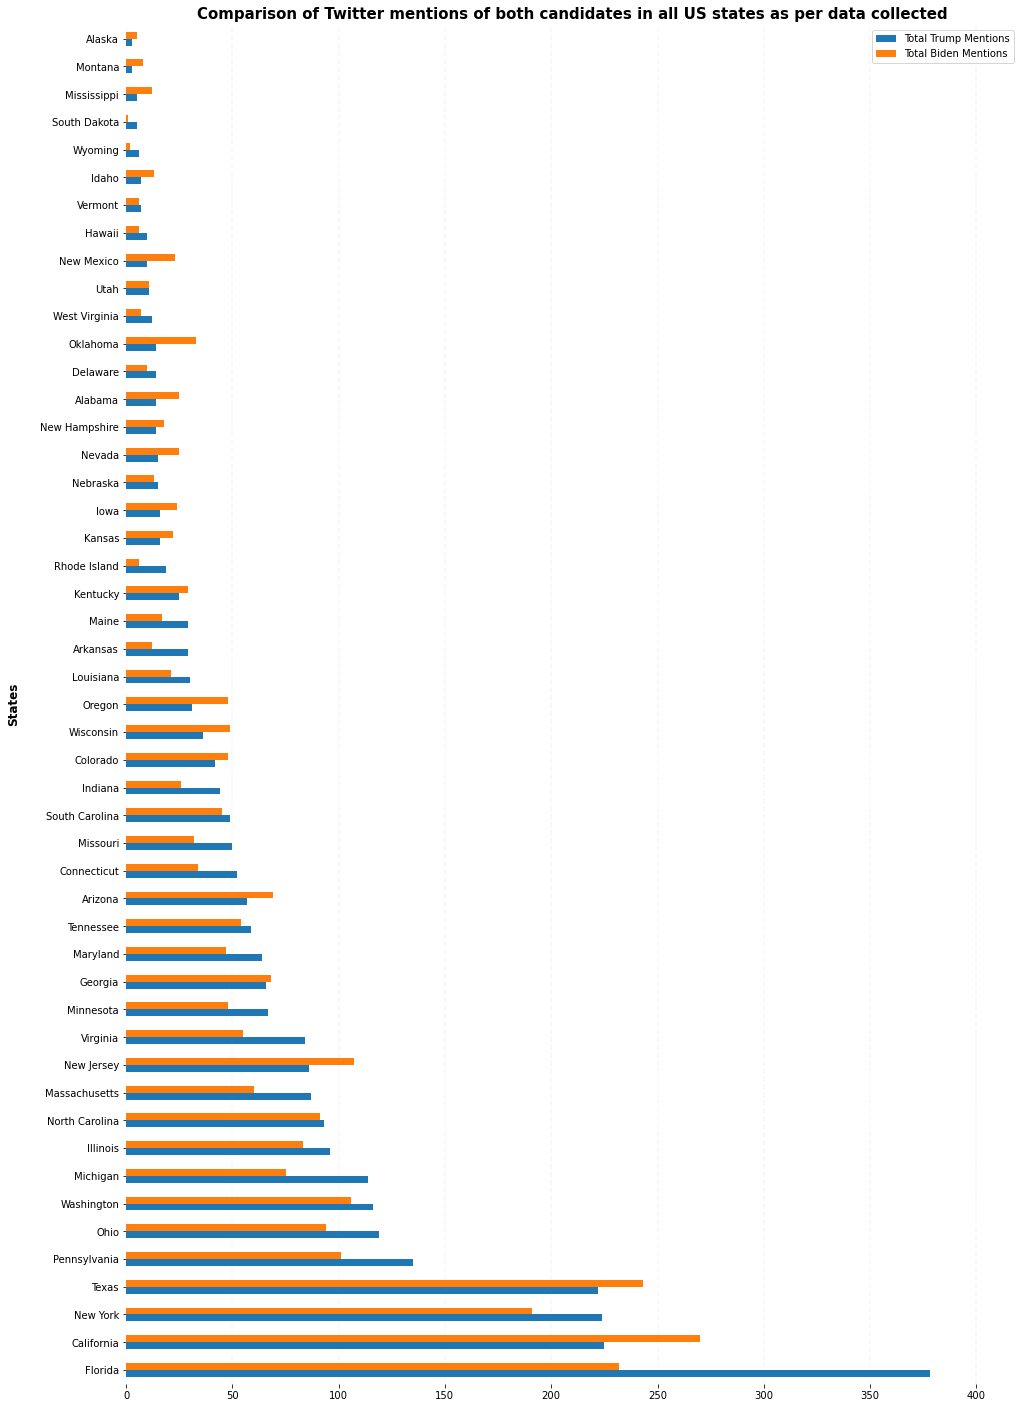

In [12]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(16, 25), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

In [13]:
# polarity_scores() method
# a dictionary showing the intensity of negative, neutral and positive sentiment in the tweet
#three values are used to create the fourth figure which is the overall compound sentiment of the tweet
#use this figure to judge whether the sentiment of a tweet is positive, negative or neutral

In [14]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))


<ipython-input-14-bd698c315da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-14-bd698c315da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))


In [15]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [16]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(20)

<ipython-input-16-5abfc56d60c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp...",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",Positive
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.184, 'co...",Negative
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
5,NaN,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",Positive
6,NaN,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
7,NaN,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.299, 'neu': 0.613, 'pos': 0.088, 'co...",Negative
8,NaN,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",Negative
9,NaN,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",Positive


In [17]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(20)

<ipython-input-17-110e7736d739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
2928,NaN,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",Negative
2929,NaN,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.146, 'neu': 0.758, 'pos': 0.096, 'co...",Negative
2930,NaN,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",Positive
2931,NaN,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...",Negative
2932,NaN,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",Negative
2933,NaN,He is a profoundly decent man: a man of faith...,afquillen,"Crossville, Tennessee",Joe Biden,Tennessee,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",Positive
2934,NaN,"Every CNN show should end with ""I'm Joe Biden...",sistertoldjah,"Charlotte, North Carolina",Joe Biden,North Carolina,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",Positive
2935,NaN,"Rest assured, that’s my best friend who wrot...",JFJMayer8,"Oregon, USA",Joe Biden,Oregon,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",Positive
2936,NaN,"Winston Churchill’s granddaughter, Edwina San...",jerryChromeX,"Texas, USA",Joe Biden,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2937,NaN,If Sleepy Joe Biden is actually elected Presi...,weisarts,"San Francisco, CA",Joe Biden,California,"{'neg': 0.112, 'neu': 0.717, 'pos': 0.17, 'com...",Positive


In [18]:
#classified every tweet data as either positive, negative or neutral
#group by state and understand the general opinion of the public of that state regarding a particular candidate

In [19]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative               4
                Neutral                3
                Positive               7
Alaska          Neutral                1
                Positive               2
Arizona         Negative              17
                Neutral               20
                Positive              20
Arkansas        Negative               6
                Neutral               12
                Positive              11
California      Negative              87
                Neutral               51
                Positive              87
Colorado        Negative              14
                Neutral                9
                Positive              19
Connecticut     Negative              19
                Neutral               17
                Positive              16
Delaware        Negative               4
                Neutral                6
                Positive               4
Florida         Negativ

In [20]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              10
                Neutral                9
                Positive               6
Alaska          Negative               2
                Neutral                1
                Positive               2
Arizona         Negative              24
                Neutral               18
                Positive              27
Arkansas        Negative               3
                Neutral                4
                Positive               5
California      Negative             115
                Neutral               68
                Positive              87
Colorado        Negative              17
                Neutral               13
                Positive              18
Connecticut     Negative              13
                Neutral               11
                Positive              10
Delaware        Negative               4
                Neutral                3
                Positiv

In [21]:
#reframe states

In [25]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
tweet_copied_df = tweet_df
for index, row in tweet_df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

NameError: name 'tweet_df' is not defined

In [26]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,50,29,21,14,24,40,36,25
Alaska,67,0,33,3,40,40,20,5
Arizona,35,30,35,57,39,35,26,69
Arkansas,38,21,41,29,42,25,33,12
California,39,39,23,225,32,43,25,270
Colorado,45,33,21,42,38,35,27,48
Connecticut,31,37,33,52,29,38,32,34
Delaware,29,29,43,14,30,40,30,10
Florida,37,34,29,378,31,31,37,232


In [27]:
#wrap up our analysis, we use the above analysis to classify whether a state is
#strong Republican/ strong Democratic

In [28]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
State,,,,,,,,,
Alabama,50,29,21,14,24,40,36,25,Strongly Republican
Alaska,67,0,33,3,40,40,20,5,Insufficient Data
Arizona,35,30,35,57,39,35,26,69,Somewhat Democratic
Arkansas,38,21,41,29,42,25,33,12,Somewhat Democratic
California,39,39,23,225,32,43,25,270,Strongly Republican
Colorado,45,33,21,42,38,35,27,48,Strongly Republican
Connecticut,31,37,33,52,29,38,32,34,Strongly Republican
Delaware,29,29,43,14,30,40,30,10,Insufficient Data
Florida,37,34,29,378,31,31,37,232,Somewhat Republican


In [29]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data      13
Somewhat Democratic    10
Somewhat Republican     7
Strongly Democratic     6
Strongly Republican    14
dtype: int64

# lDA

In [30]:
df = pd.read_csv('tweets_election.csv', encoding='UTF-8')
print(len(df), 'tweets')

5553 tweets


In [31]:
df.head()

,Unnamed: 0,geo,text,user,location,Subject,state
0,3,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,6,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,11,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,15,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,16,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [32]:
tweets_df=df.loc[:,['text']]
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5553 non-null   object
dtypes: object(1)
memory usage: 43.5+ KB


In [33]:
a = 5000
for i in range(a,a+10):
    print(tweets_df.text[i])
    print()

 Joe Biden and Kamala Harris Support Criminals and Demoralize Cops 

 Trump's white supremacist senior adviser Stephen Miller has fleshed out plans to rev up Trump's restrictive immigratio…

Joe Biden Toilet Paper 

 Joe Biden and Barack Obama are coming to Flint and Detroit with drive-in campaign stops.

 Winston Churchill’s granddaughter, Edwina Sandys, joins the fight."I rarely wade into the political waters, but this y…

 “My Democratic vote wouldn’t make me a Democrat, it would make me a better Republican... the party I knew is gone.” - …

 To make a long story short, apparently, Glenn Greenwald was colluding with Tucker Carlson to help Trump by smearing Joe Bi…

 This Sunday, we set our clocks back an hour. This Tuesday, we move our country forward and elect Joe Biden.

 Joe Biden’s America  

 This Sunday, we set our clocks back an hour. This Tuesday, we move our country forward and elect Joe Biden.



In [34]:
#Data cleansing

In [35]:
def clean_text(text):
#''', , and '''
#Make text lowercase   
 text = text.lower()
#remove text in square brackets
 text = re.sub(r'\[.*?\]', '', text)
#remove punctuation   
 text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove words containing numbers
 text = re.sub(r'\w*\d\w*', '', text)
 return text
tweets_df_clean = pd.DataFrame(tweets_df.text.apply(lambda x: clean_text(x)))

NameError: name 're' is not defined